### Challenge:
You have seen some examples of how to interact with JSON, CSV and make API Calls. Take
some time to explore the YAHOO Finance Guide at https://financeapi.net/ which shows you
endpoints for calling information. Your job is to code a Python Program that does the following
things:
1. Takes user input for a stock (using the Ticker Symbol): IE with the input() command
2. You will display back the user: Ticker Name, Full Name of the Stock, Current Market
Price, Target Mean Price, 52 week high and 52 week low. Also, output 5 of the current
trending stock.
3. Put that data in a DataFrame and then store that to a CSV file
4. Handle Errors (IE, the stock doesn’t exist and/or the API is not returning information)
You will have to read the documentation and figure out which modules to call to get the data
that you need. You will need to make more than one call to this API. Use the examples in our
Zoom Session to guide you, but the documentation will be enough. Post your code to GitHub.
### Bonus –
1. Use MatPlotLib to chart the historical price of a stock price’s highest value over the past
5 days.


In [1]:
import json
import pandas as pd
import json
import requests

#get stock from the user
# stock=input()
# print("The Stock we will research is:" + stock)

apikey="mQNZK1nQ0n5KktdUxat5z8rlxwoMtytH2OHvWyFx"

# url = "https://yfapi.net/v6/finance/quote"

# querystring = {"symbols":stock}

# headers = {
#     'x-api-key': apikey
#     }

# response = requests.request("GET", url, headers=headers, params=querystring)

# print(response.text)

# #print the company name and price
# stock_json = response.json()
# print(stock_json['quoteResponse']['result'][0]["longName"] + " Price:$" + str(stock_json['quoteResponse']['result'][0]["regularMarketPrice"]))

Ticker Name, Full Name of the Stock, Current Market Price, Target Mean Price, 52 week high and 52 week low. Also, output 5 of the current trending stock.

In [13]:
BASE_URL = 'https://yfapi.net'

def get_stock_data(ticker):
    url = f"{BASE_URL}/v6/finance/quote"
    headers = {
        'x-api-key': apikey
    }

    querystring = {"symbols":ticker}
    response = requests.request("GET", url, headers=headers, params=querystring)

    #for mean data
    modules = "financialData"
    params = {"modules":modules}
    mean_url = f"{BASE_URL}/v11/finance/quoteSummary/{ticker}"
    mean_response = requests.request("GET", mean_url, headers=headers, params=params)


    if response.status_code == 200 or mean_response.status_code == 200:
        stock_json = response.json()
        mean_json = mean_response.json()
        print(mean_json)
        stock_info = {
            'Ticker Name': stock_json['quoteResponse']['result'][0]["symbol"],
            'Full Name': stock_json['quoteResponse']['result'][0]["longName"],
            'Current Market Price': stock_json['quoteResponse']['result'][0]["regularMarketPrice"],
            'Target Mean Price': mean_json['quoteSummary']['result'][0]['financialData']['targetMeanPrice']['raw'],
            '52 Week High': stock_json['quoteResponse']['result'][0]["fiftyTwoWeekHigh"],
            '52 Week Low': stock_json['quoteResponse']['result'][0]["fiftyTwoWeekLow"]
        }
        return stock_info
    else:
        print(f"Error fetching data for {ticker}: {response.status_code}")
        return None

ticker = input("Enter the stock ticker symbol (e.g., AAPL): ").upper()
stock_data = get_stock_data(ticker)
if stock_data:
    for key, value in stock_data.items():
        print(f"{key}: {value}")

Enter the stock ticker symbol (e.g., AAPL): AAPL
{'quoteSummary': {'result': [{'financialData': {'maxAge': 86400, 'currentPrice': {'raw': 227.725, 'fmt': '227.73'}, 'targetHighPrice': {'raw': 300.0, 'fmt': '300.00'}, 'targetLowPrice': {'raw': 183.86, 'fmt': '183.86'}, 'targetMeanPrice': {'raw': 240.58, 'fmt': '240.58'}, 'targetMedianPrice': {'raw': 243.0, 'fmt': '243.00'}, 'recommendationMean': {'raw': 2.0, 'fmt': '2.00'}, 'recommendationKey': 'buy', 'numberOfAnalystOpinions': {'raw': 40, 'fmt': '40', 'longFmt': '40'}, 'totalCash': {'raw': 61801000960, 'fmt': '61.8B', 'longFmt': '61,801,000,960'}, 'totalCashPerShare': {'raw': 4.065, 'fmt': '4.07'}, 'ebitda': {'raw': 131781001216, 'fmt': '131.78B', 'longFmt': '131,781,001,216'}, 'totalDebt': {'raw': 101304000512, 'fmt': '101.3B', 'longFmt': '101,304,000,512'}, 'quickRatio': {'raw': 0.798, 'fmt': '0.80'}, 'currentRatio': {'raw': 0.953, 'fmt': '0.95'}, 'totalRevenue': {'raw': 385603010560, 'fmt': '385.6B', 'longFmt': '385,603,010,560'}, '

In [14]:
def get_trending_stocks():
    url = f"{BASE_URL}/v1/finance/trending/US" #setting base region to US
    headers = {
        'x-api-key': apikey
    }

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching trending stocks: {response.status_code}")
        return None

def get_top_5_trending_stocks(data):
    try:
        quotes = data['finance']['result'][0]['quotes']
        top_5 = [quote['symbol'] for quote in quotes[:5]]
        return top_5
    except (KeyError, IndexError, TypeError):
        return None

In [15]:
trending_stocks_data = get_trending_stocks()
trending_stocks = get_top_5_trending_stocks(trending_stocks_data)
if trending_stocks:
    print("\nTrending Stocks:")
    for stock in trending_stocks:
        print(stock)


Trending Stocks:
NQ=F
ES=F
YM=F
AMSC
GC=F


In [16]:
if trending_stocks:
    df = pd.DataFrame(trending_stocks, columns=['Symbol'])

    print("\nTrending Stocks:")
    print(df)

    csv_filename = 'trending_stocks.csv'
    df.to_csv(csv_filename, index=False)
    print(f"\nData saved to {csv_filename}")
else:
    print("No trending stocks data available.")


Trending Stocks:
  Symbol
0   NQ=F
1   ES=F
2   YM=F
3   AMSC
4   GC=F

Data saved to trending_stocks.csv


### bonus?

In [51]:
def get_stocks_high():
    url = f"{BASE_URL}/v8/finance/chart/{ticker}"
    headers = {
        'x-api-key': apikey
    }
    params = {"range":"5d",
              "interval":"1d",
              "events":"div%2Csplit"}
    response = requests.get(url, headers=headers,params=params)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching trending stocks: {response.status_code}")
        return None

In [58]:
def get_stock_high_5d(data):
    try:
        charts = data['chart']['result'][0]['indicators']['quote'][0]['high']
        return charts
    except (KeyError, IndexError, TypeError):
        return None

In [59]:
stock_high = get_stocks_high()
stock_high_5d = get_stock_high_5d(stock_high)
if stock_high_5d:
    print(stock_high_5d)

[229.4499969482422, 229.35000610351562, 227.2899932861328, 228.5, 229.52000427246094]


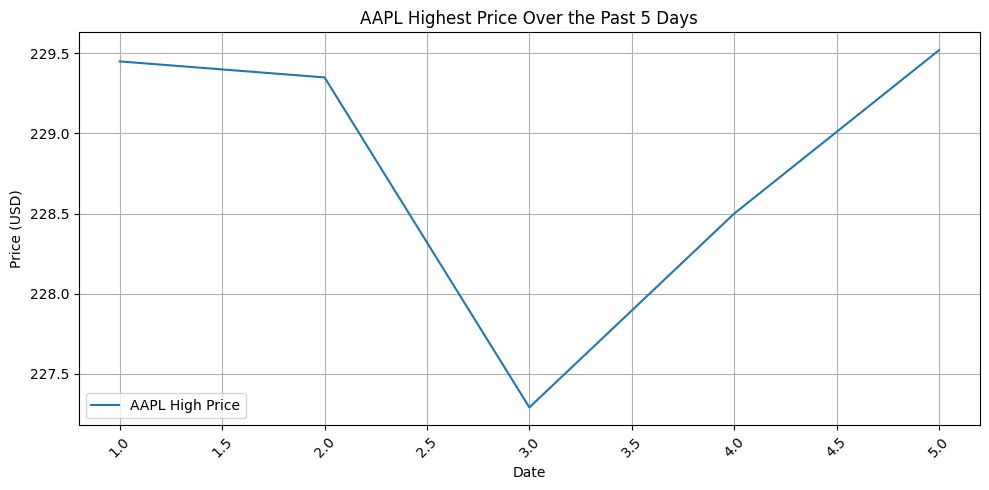

In [70]:
import matplotlib.pyplot as plt
import numpy as np

dates = np.arange(1, len(stock_high_5d) + 1)

plt.figure(figsize=(10, 5))
plt.plot(dates, stock_high_5d, label=f'{ticker} High Price')
plt.title(f'{ticker} Highest Price Over the Past 5 Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()